## **Problem 1: Rainfall Records**

- LOs: #Modeling, #EmpiricalAnalysis
- HCs: #distributions

We explore how record rainfalls (highest ever or lowest ever) are distributed.

1. Do a bit of research online (cite your sources) and come up with a plausible continuous probability distribution for the annual rainfall (mm per year) in Berlin. Motivate your choice of distribution.


A plausible continuous probability distribution for the annual rainfall (mm per year) in Berlin is a normal distribution. On average, Berlin obtains 591 mm of rainfall per year based on data from [ClimaTemps](http://www.berlin.climatemps.com/precipitation.php). Another source, [Climate-Data](https://en.climate-data.org/europe/germany/berlin/berlin-2138/), presents data (perhaps from a different year) that shows that the rainfall in Berlin is 669 mm per year.

The climate graph from [Climate-Data](https://en.climate-data.org/europe/germany/berlin/berlin-2138/) suggests that on a month to month basis rainfall is normally distributed. Considering this phenomenon would affect yearly rainfall, then we can expect that it too would be normally distributed.

Considering the information and data found on the resources cited, a plausible continuous probability distribution for the annual rainfall (mm per year) in Berlin is a Normal distribution with a mean of 630 and a standard deviation of 26. 

In [1]:
# Importing relevant library for statistical data visualization
import seaborn as sns

In [2]:
# Importing relevant library for statistical data manipulation
from scipy.stats import norm

# Obtain normally distributed data for annual rainfall in Berlin
data_normal = norm.rvs(size = 10000, loc = 630, scale = 24)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

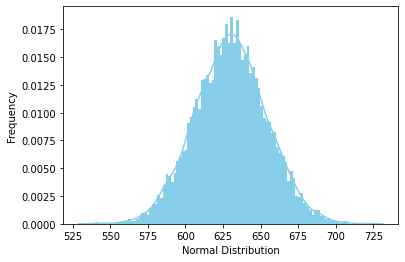

In [3]:
# Assign plotting attributed to the data to output a data visualization
ax = sns.distplot(data_normal, bins = 100, 
                  kde = True, color = 'skyblue', 
                  hist_kws = {"linewidth":15, 'alpha':1})

# Setting labels for the x-axis and y-axis
ax.set(xlabel = 'Normal Distribution', ylabel = 'Frequency')


2. Next, simulate the annual rainfall in Berlin for 101 consecutive years (labeled Year 0 up to Year 100) by generating i.i.d. samples from your chosen probability distribution. 

In [4]:
# Importing libraries for math operations and plotting
import math as mt
import numpy as np
import matplotlib.pyplot as plt


# Define a function to simulate rainfall
def rainfallSimulation():
    number_list = [] # Here, the empty array will get populated with our results
    
    # To simulate 101 consecutive years, from Year 0 to Year 100
    for i in range(102):
        # A number that represents the annual rainfall for that year 
        number = round(np.random.normal(630, 26), 2)
        # The number is appended to the original empty list
        number_list.append((i, number))
        
    x = [x[0] for x in number_list] # Setting the x-values to be the Year (e.g., Year 0, 1, 2...)
    y = [x[1] for x in number_list] # Setting the y-values to be the rainfall 
    
    return (x,y) # Simulation returns 2-tuple 

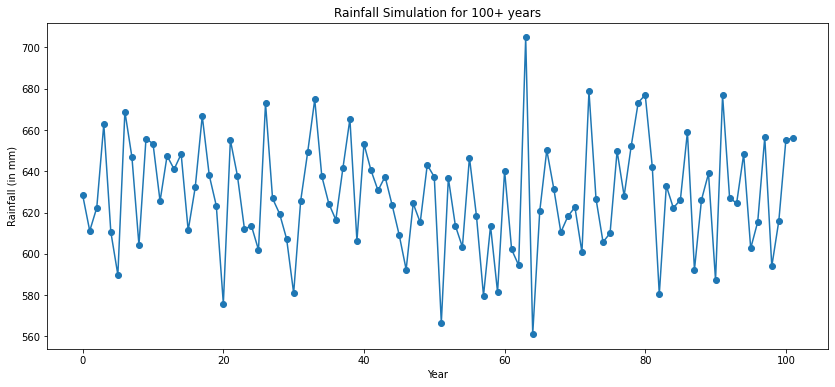

In [5]:
plt.rcParams["figure.figsize"] = [14.00, 6.00]
# Plotting the x-values (Year) vs y-values (Rainfall) against each other
plt.plot(rainfallSimulation()[0], rainfallSimulation()[1], marker="o")
# Add title to plot
plt.title('Rainfall Simulation for 100+ years')
plt.ylabel('Rainfall (in mm)')
plt.xlabel('Year')
plt.show()



A rainfall value is a record high if it is greater than those in all previous years (starting with Year 0), and a record low if it is lower than those in all previous years. In the century starting from Year 1 and ending with Year 100 (including those two years), produce a histogram to show the distribution over the number of “record” years – i.e., the number of years that have **either** a record high **or** a record low.

Show empirically that the expected value of this distribution is

$$2 \sum_{i=1}^{100} \frac{1}{i+1} \approx 8.395$$


In [6]:
# Defining a function to find the number of record high (rainfalls)
def numberOfRecordHigh(arr):
 
    s = set() # Initialize set
    record_high = [] # Initialize empty array to append record_highs here
    number_of_high = 0 # The number of total record highs
    
    # Iterate through all the rainfall values for every year
    # Checks for the rainfall if it is a record high
    for i in range(102):
        
        it = [x for x in s if x >= arr[i]]
        
        # If it is a record high, it is represented as a -1 
        if len(it) == 0:
            record_high.append(-1)
            # Number of total record highs increases 
            number_of_high += 1
        
        else:  
            record_high.append(min(it))      
 
        s.add(arr[i])
        
    # The variable number_of_high counts the first year, so we subtract it    
    return(number_of_high - 1)

In [7]:
# Defining a function to find the number of record lows (rainfalls)
def numberOfRecordLow(arr):

    S = [] # Initialize empty list
    record_low = [] # Here the record lows will be appended
    number_of_low = 0 # The number of total record lows
 
    # Iterate through all the rainfall values for every year
    # Checks for the rainfall if it is a record low
    for i in range(102):
     
        while (len(S) > 0 and S[-1] >= arr[i]):
            S.pop()
 
        # If it is a record low, it is represented as a -1 
        if (len(S) == 0):
            record_low.append(-1)
            # Number of total record lows increases 
            number_of_low += 1
            
        else:
            record_low.append(S[-1])
            
        S.append(arr[i])
        
    # The variable number_of_low counts the first year, so we subtract it   
    return(number_of_low - 1)

In [8]:
high_low = [] # Empty list to append both record highs and lows

# Simulating 1000 times the total number of record rainfalls (both high and low)
for i in range(1000):
    high_low.append(numberOfRecordHigh(rainfallSimulation()[1]) + numberOfRecordLow(rainfallSimulation()[1]))

(array([  7.,  14.,  41.,  73., 115., 139., 149., 260.,  87.,  55.,  28.,
         21.,   6.,   5.]),
 array([ 1.        ,  2.14285714,  3.28571429,  4.42857143,  5.57142857,
         6.71428571,  7.85714286,  9.        , 10.14285714, 11.28571429,
        12.42857143, 13.57142857, 14.71428571, 15.85714286, 17.        ]),
 <BarContainer object of 14 artists>)

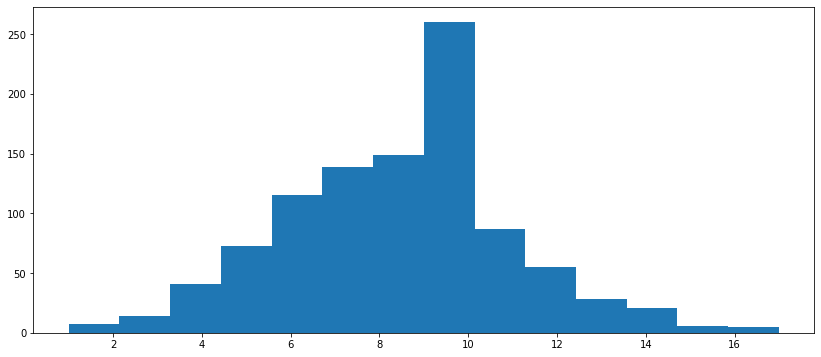

In [9]:
# Plotting a histogram for the record highs and lows, shows mean roughly between 8 and 9 as expected
plt.hist(high_low, bins=14)

3. Next, use your rainfall distribution to simulate the first year after Year 0 when a record high (not low) rainfall occurs. Produce a histogram of the distribution over the number of years until the first record high after Year 0.

    Show empirically, using a line plot on top of your histogram, that this distribution has probability mass function

$$ P(k) = \frac{1}{k \, (k+1)} $$

In [10]:
# Defining a function to find when the first record high happens
def firstYearOfRecordHigh(arr):
 
    s = set() # Initialize set
    year_of_record_high = [] # Initialize empty list to append the year of the record high
    first_year = [] # List for the first year of record high
    
    # Iterate through all the rainfall values for every year
    # Checks for rainfall if it is a record high
    for i in range(102):
        
        it = [x for x in s if x >= arr[i]]
        
        # If it is a record high, it is represented as a -1
        if len(it) == 0:
            year_of_record_high.append(-1)
            
        else:  
            year_of_record_high.append(min(it))      
 
        s.add(arr[i])
    
    # The first element is changed to 0 so as to represent initial param
    year_of_record_high[0] = 0
    
    # Iterate through the entirety of the record highs
    for i in range(102):
        # Takes the index (year) of when record highs happend
        if year_of_record_high[i] == -1:
            first_year.append(i)
    
    # Returns only the first year when a record high happens
    return(first_year[0])

In [11]:
high_year = []

# Simulate for 10000 times the first year of a record high rainfall simulation
for i in range(10000):
    try:
        high_year.append(firstYearOfRecordHigh(rainfallSimulation()[1]))
    except IndexError:
        pass

In [12]:
# Defining a function for the probability mass function
def f(k):
    try:
        return 1 / k * (k + 1) 
    except RuntimeWarning:
        pass
    
t1 = np.arange(0.0, 100.0, 1)

<ipython-input-12-0aec276101b2>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / k * (k + 1)


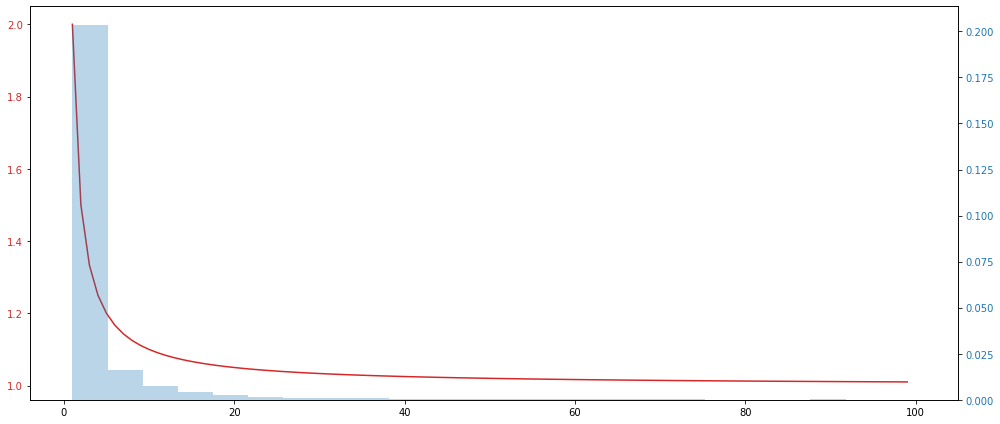

In [13]:
# Import relevant libraries for array manipulation and plots
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(t1, f(t1), color=color) # Plotting probability mass function
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# Plotting the number of years until the first record high
ax2.hist(high_year, density = True, bins=24, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.show()

4. Explain why your results in Questions 2 and 3 do **not** depend on your choice of rainfall distribution in Question 1.

The results in Questions 2 and 3 do not depend on the choice of rainfall distribution in Question 1 because esentially we are sampling randomly from a given probability distribution and because of the central limit theorem we ought to find that the samples follow a Normal distribution. Also, given that we choose a mean for the probability distribution, a significant portion of the samples will rapidly be the year in which there is an all-time high and it becomes less likely that it will take a lot of time for a year to have an all-time high.